In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

c:\Users\KHALFALLAH\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
data = pd.read_csv('Live.csv', sep =",")

In [5]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
# Ajout d'index
data = data.set_index('status_id')
data.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
status_id,,,,,,,,,,,,,,,
246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [7]:
data.columns

Index(['status_type', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4'],
      dtype='object')

In [8]:
# Suppression des colonnes inutiles
data.drop(['Column1', 'Column2', 'Column3', 'Column4','status_published'], axis=1,inplace = True)
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,
246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0


# **Exploration initiale**

In [17]:
# Dimensions du dataset
data.shape

(7050, 10)

In [18]:
# Informations de la base
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7050 entries, 246675545449582_1649696485147474 to 1050855161656896_1050858841656528
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 605.9+ KB


In [19]:
# Pourcentages des valeurs manquantes de chacune des variables de notre dataset
(data.isna().sum()/data.shape[0]).sort_values(ascending = False)*100

status_type      0.0
num_reactions    0.0
num_comments     0.0
num_shares       0.0
num_likes        0.0
num_loves        0.0
num_wows         0.0
num_hahas        0.0
num_sads         0.0
num_angrys       0.0
dtype: float64

# **Analyse exploratoire**

### **Analyse univariée**

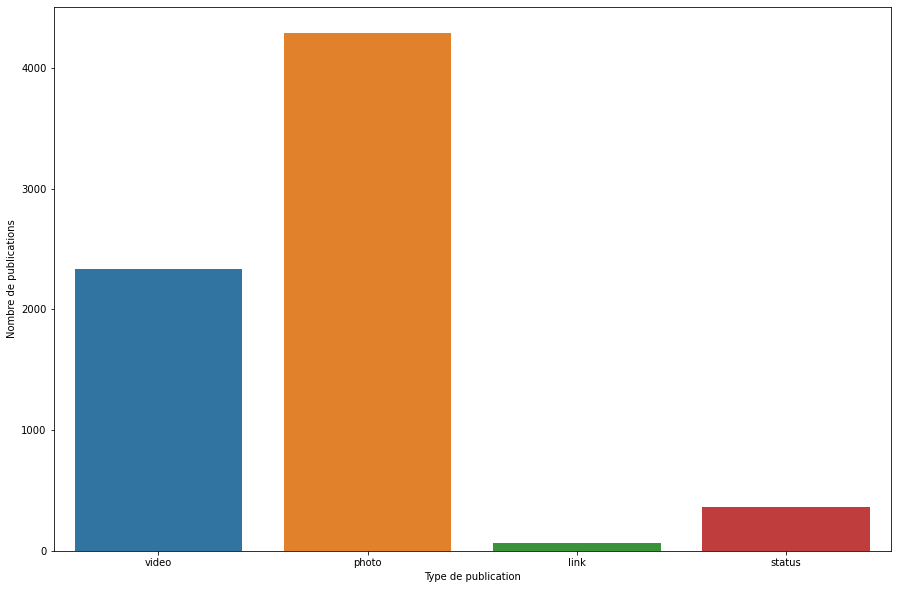

photo     0.608227
video     0.331064
status    0.051773
link      0.008936
Name: status_type, dtype: float64


In [10]:
# Distribution de la variable status_type
plt.figure(figsize =(15,10))
sns.countplot(x = 'status_type',data = data)

plt.xlabel('Type de publication')
plt.ylabel("Nombre de publications")

plt.show()

print(data['status_type'].value_counts(normalize =True))

Les publications de type **photo** et **video** sont beaucoup plus représentatives.

In [11]:
# Audit de l'unique variable qualitative status_type
data.status_type.describe()

count      7050
unique        4
top       photo
freq       4288
Name: status_type, dtype: object

In [12]:
numCols = data.select_dtypes(include = 'number').columns.tolist()
numCols

['num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

In [13]:
# Audit des variables numériques
data[numCols].describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0


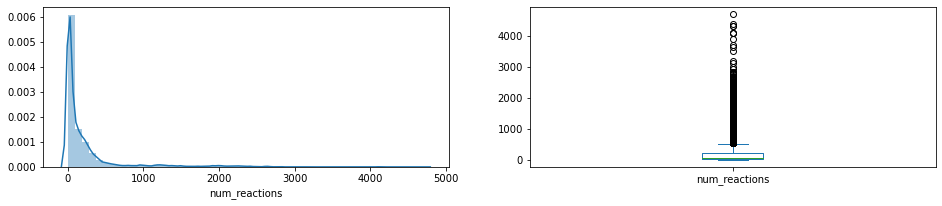

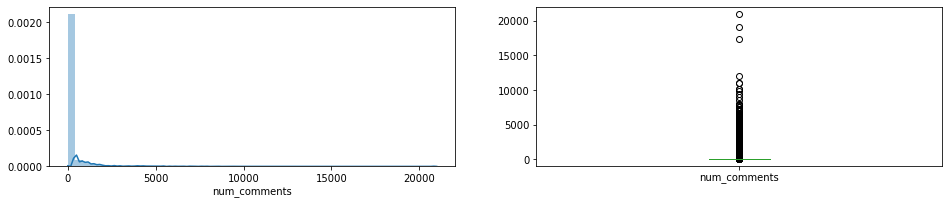

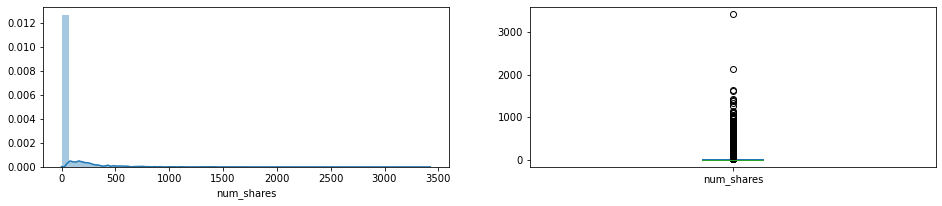

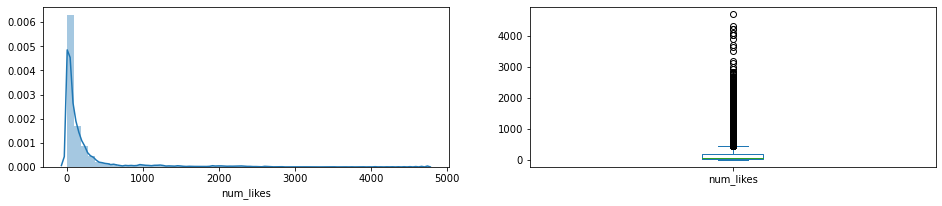

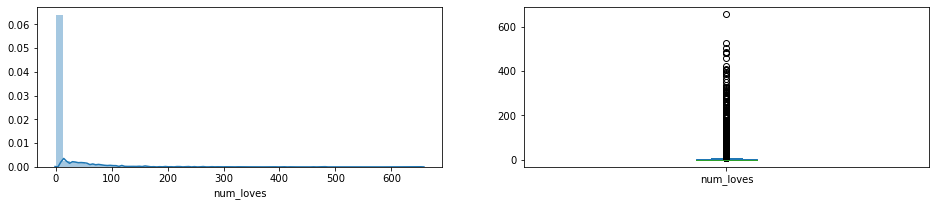

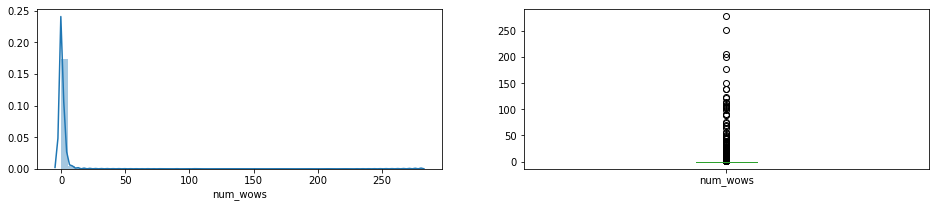

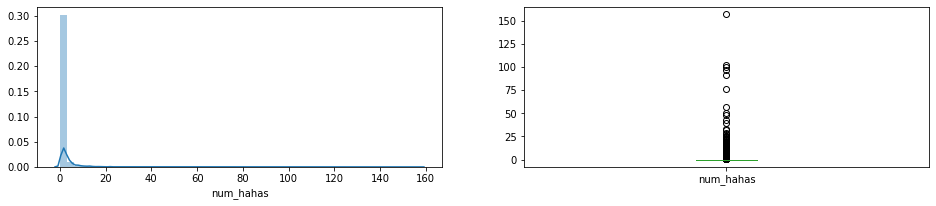

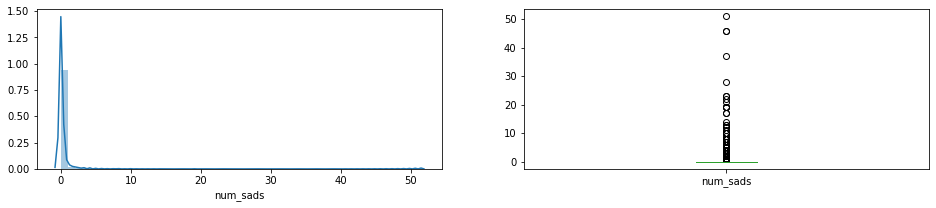

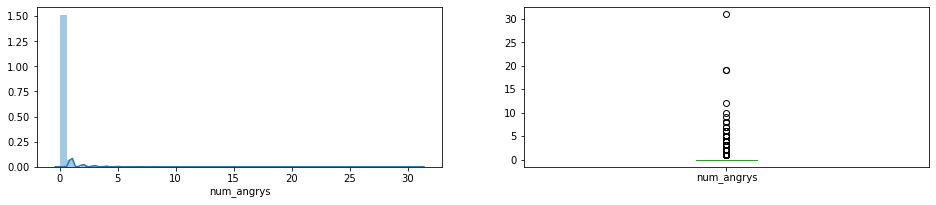

In [14]:
#Distribution des variables quantitatives
for col in numCols:
    plt.subplot(321)
    sns.distplot(data[col])

    plt.subplot(322)
    data[col].plot.box(figsize=(16,10))
    plt.suptitle('')
    plt.show()

On peut remarquer que toutes les variables numériques sont asymétriques, de plus elles renferment beaucoup de valeurs abérrantes.

### **Analyse bivariée**

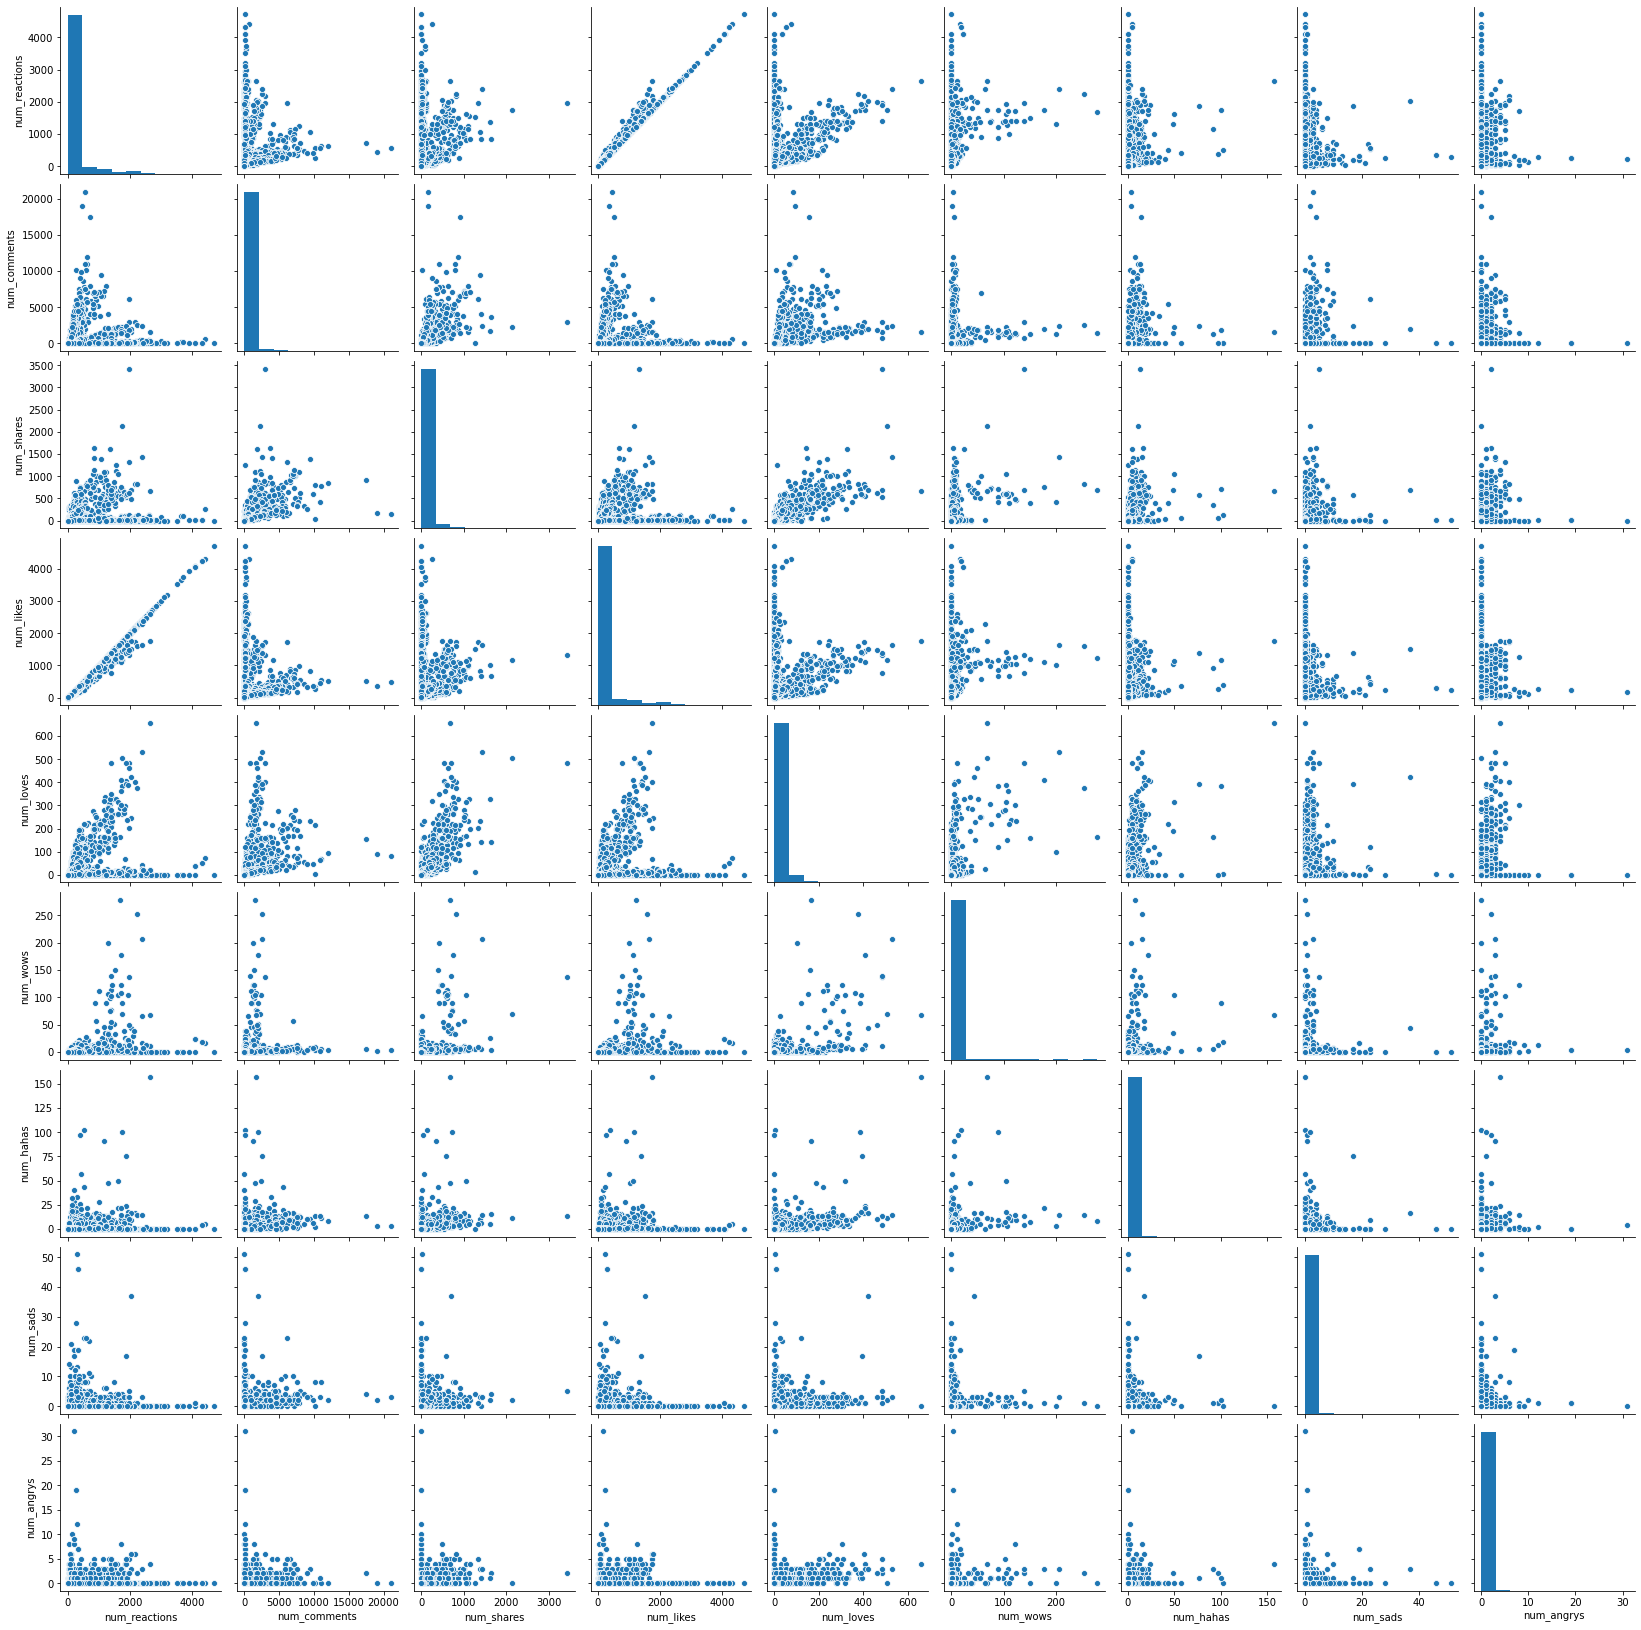

In [14]:
sns.pairplot(data)
plt.show()

In [14]:
# Calculer la corrélation de Spearman des variables numériques
correlation_spearman = data[numCols].corr(method='spearman')

# Afficher le résultat
correlation_spearman

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.731731,0.557824,0.996848,0.566720,0.481648,0.401321,0.272188,0.261825
num_comments,0.731731,1.000000,0.624171,0.708545,0.638492,0.496706,0.541926,0.354643,0.355031
num_shares,0.557824,0.624171,1.000000,0.526672,0.635137,0.460756,0.567575,0.358708,0.364631
num_likes,0.996848,0.708545,0.526672,1.000000,0.534878,0.466170,0.361442,0.249582,0.235741
num_loves,0.566720,0.638492,0.635137,0.534878,1.000000,0.627628,0.618892,0.394369,0.380992
num_wows,0.481648,0.496706,0.460756,0.466170,0.627628,1.000000,0.481603,0.306713,0.313149
num_hahas,0.401321,0.541926,0.567575,0.361442,0.618892,0.481603,1.000000,0.441237,0.482089
num_sads,0.272188,0.354643,0.358708,0.249582,0.394369,0.306713,0.441237,1.000000,0.404778
num_angrys,0.261825,0.355031,0.364631,0.235741,0.380992,0.313149,0.482089,0.404778,1.000000


In [16]:

# Extraction des couples de variables ayant une corrélation supérieure à 0.7
corr_threshold = 0.7
corr_pairs = {}

for col in correlation_spearman.columns:
    corr_pairs[col] = []
    corr_values = correlation_spearman[abs(correlation_spearman[col]) > corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation supérieure à 0.7
print("Couples de variables ayant une corrélation supérieure à 0.7 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.7 :

num_reactions - num_comments
num_reactions - num_likes
num_comments - num_reactions
num_comments - num_likes
num_likes - num_reactions
num_likes - num_comments


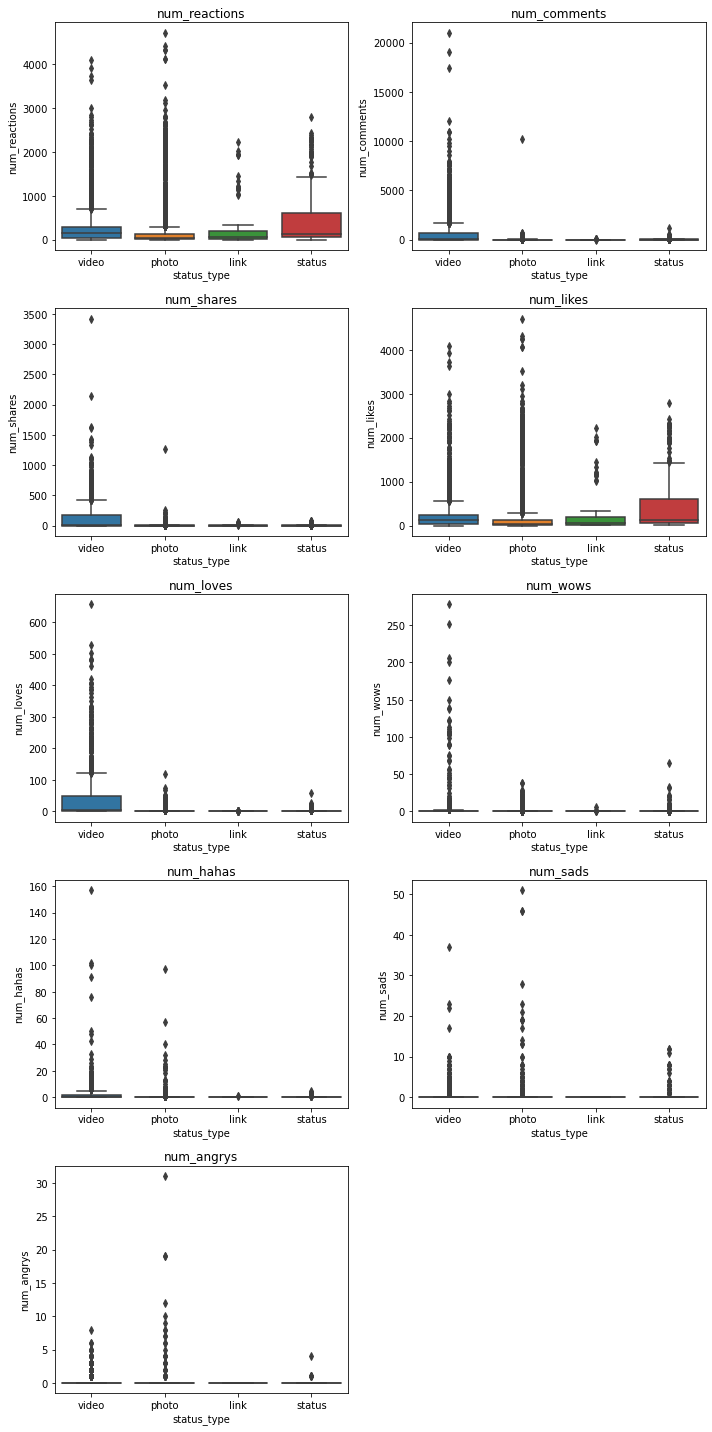

In [51]:
# Créer un boxplot pour chaque colonne numérique
num_cols = len(data[numCols].columns)

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4* num_rows))
for i, column in enumerate(data[numCols].columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='status_type', y=column, data=data)
    plt.title(column)

plt.tight_layout()
plt.show()


On peut remarquer que les médianes des variables sont inégales, en fonction le type de publication. 

# **Prétraitement**

### **Normalisation**

In [9]:
from sklearn.preprocessing import RobustScaler

In [10]:
df_ = data.copy()

In [15]:
scaler = RobustScaler()
df_scaled = scaler.fit_transform(data[numCols])
df_scaled

array([[ 2.32425743, 22.08695652, 65.5       , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.4480198 , -0.17391304,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82920792, 10.08695652, 14.25      , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.28465347, -0.17391304,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.44306931,  0.34782609,  5.5       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.21039604, -0.17391304,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# **Application du Kmeans**

In [17]:
from sklearn.cluster import KMeans

In [16]:
# Liste pour stocker les distances pour les differentes valeurs de k
from sklearn.metrics import silhouette_score
wcss = []
score_silhouette = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    score_silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

In [18]:
# Somme des distances pour chaque valeur de k variant de 2 à 10, et on remarque que les distances diminuent car les clusters deviennent plus petits
wcss

[9559433.464533724,
 6718233.314330026,
 5330519.978975152,
 4229755.175001995,
 3523259.556744922,
 2914748.2078179414,
 2541018.022897723,
 2289826.8036023206,
 2106388.578343724]

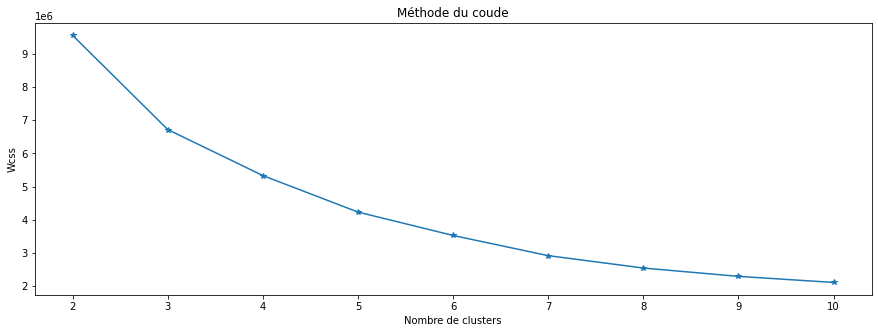

In [28]:
# Utilisation de la méthode du "coudé" ou "Elbow method" pour trouver le k optimal
plt.figure(figsize=(15,5))
plt.plot(range(2, 11), wcss, marker ='*')
plt.xlabel('Nombre de clusters')
plt.ylabel('Wcss')
plt.title('Méthode du coude')
plt.show()

On peut remarquer qu'il y'a eu cassure pour k = 3.

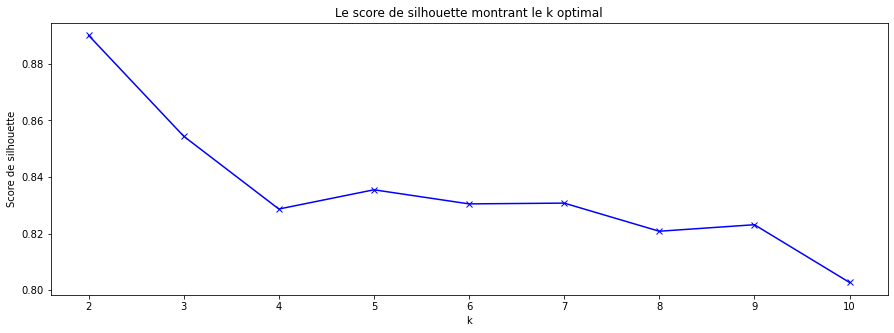

In [29]:
#Graphique du score de silhouette : The silhouette method assesses and validates cluster data. It finds how well each data point  is classified.
#The plot of the silhouette score helps us to visualize and interpret how well data points are tightly grouped within their own clusters and separated from others
plt.figure(figsize=(15,5))
plt.plot(range(2, 11), score_silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()


On peut remarquer qu'il y'a eu cassure pour k = 3. Neanmoins, on choisit k = 4, comme étant le k optimal.

In [30]:
# Appliquer KMeans avec le nombre de clusters optimal trouvé (supposons que c'est 3 pour cet exemple)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [31]:
# Ajouter les labels de cluster du dataset initial
data['cluster'] = kmeans.predict(df_scaled)   # Oubien data['cluster'] = kmeans.labels_
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
status_id,,,,,,,,,,,
246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,2
246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,0
246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,0
246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,0
246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,0


In [32]:
# Inspection des clusters suivant les variables
df_cluster = data.groupby(['cluster'])[data[numCols].columns].mean().round(0)
df_cluster

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
cluster,,,,,,,,,
0,206.0,27.0,4.0,203.0,2.0,1.0,0.0,0.0,0.0
1,752.0,2950.0,503.0,576.0,145.0,19.0,9.0,2.0,1.0
2,268.0,832.0,208.0,197.0,66.0,2.0,2.0,1.0,0.0
3,756.0,8832.0,775.0,582.0,150.0,10.0,9.0,3.0,1.0


On peut remarquer que les utilisateurs des clusters **3** et **1** sont plus actifs, celà dit qu'il y a interet de les conserver et de 
réflechir davantage sur comment optimiser des stratégies de publications en vue d'améliorer des ventes <br>.

Cependant, les utilisateurs des clusters **0** et **2** ne sont pas vraiment actifs, meme si les nombres de commentaires et de partages sont répandus
dans le cluster **2**, il y'a intéret à réfléchir sur comment attirer davantage les utilisateurs de ces deux clusters, afin qu'ils soient beaucoup plus reactifs.

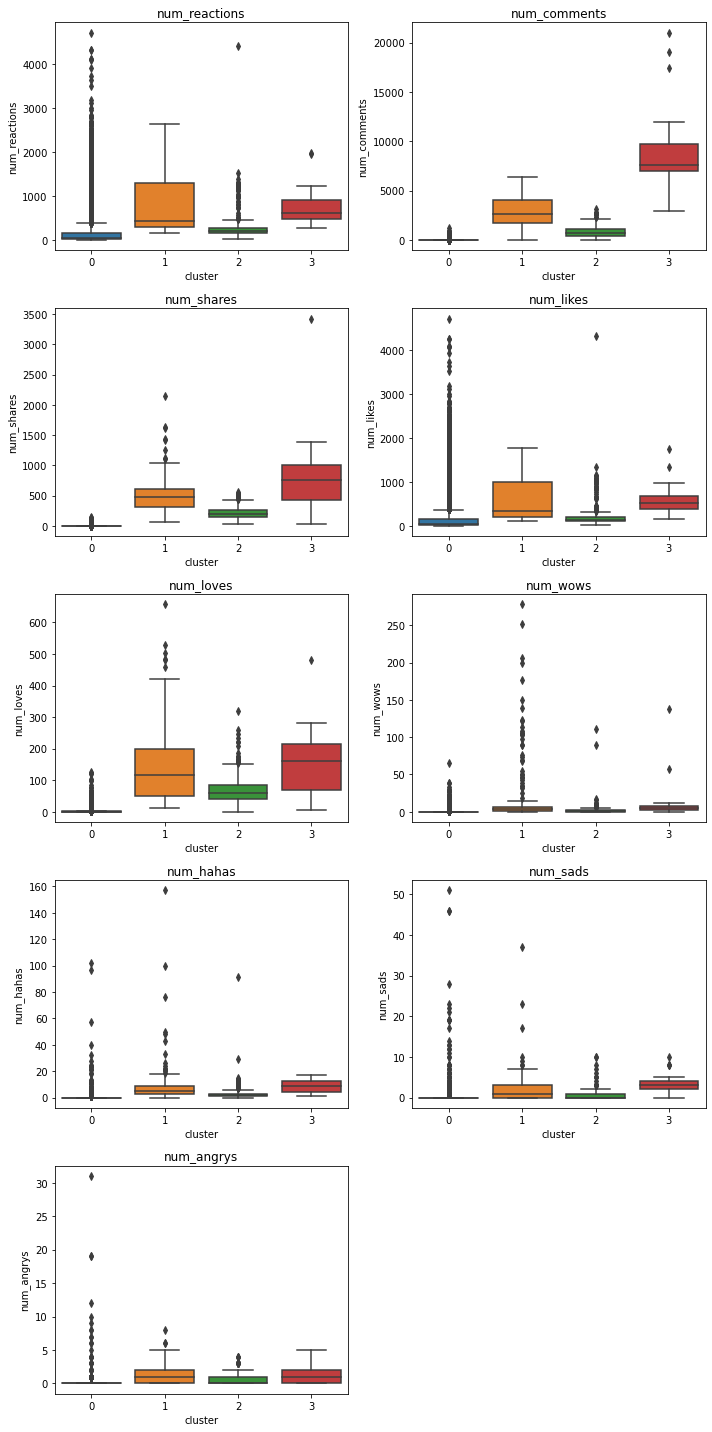

In [41]:
# Créer un boxplot pour chaque colonne numérique
num_cols = len(data[numCols].columns)

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4* num_rows))
for i, column in enumerate(data[numCols].columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='cluster', y=column, data=data)
    plt.title(column)

plt.tight_layout()
plt.show()


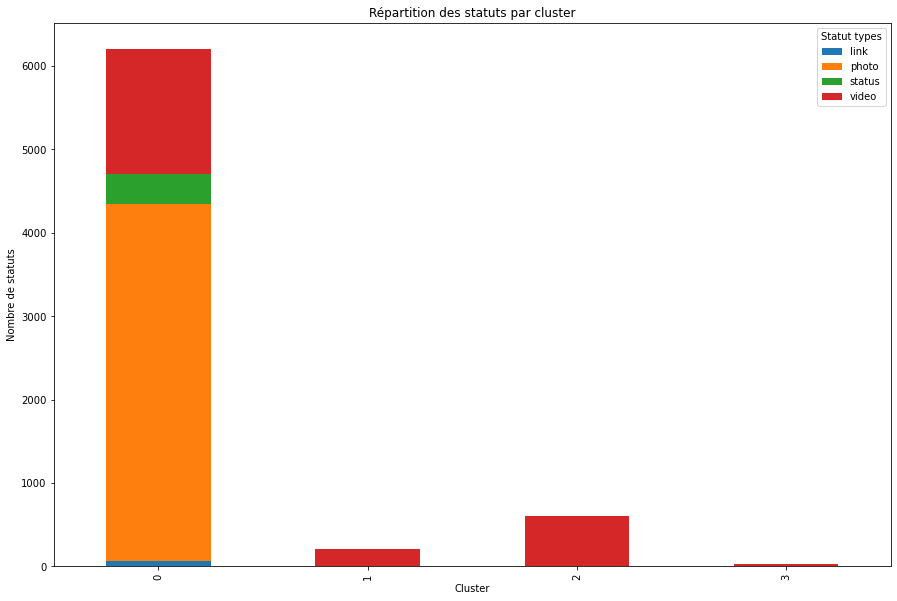

In [40]:
# Créer une table de contingence entre cluster_label et statut_types
contingency_table = pd.crosstab(data['cluster'], data['status_type'])

# Tracer le barplot
contingency_table.plot(kind='bar', stacked=True, figsize =(15,10))

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster')
plt.ylabel('Nombre de statuts')
plt.title('Répartition des statuts par cluster')

# Afficher la légende
plt.legend(title='Statut types')

# Afficher le graphique
plt.show()

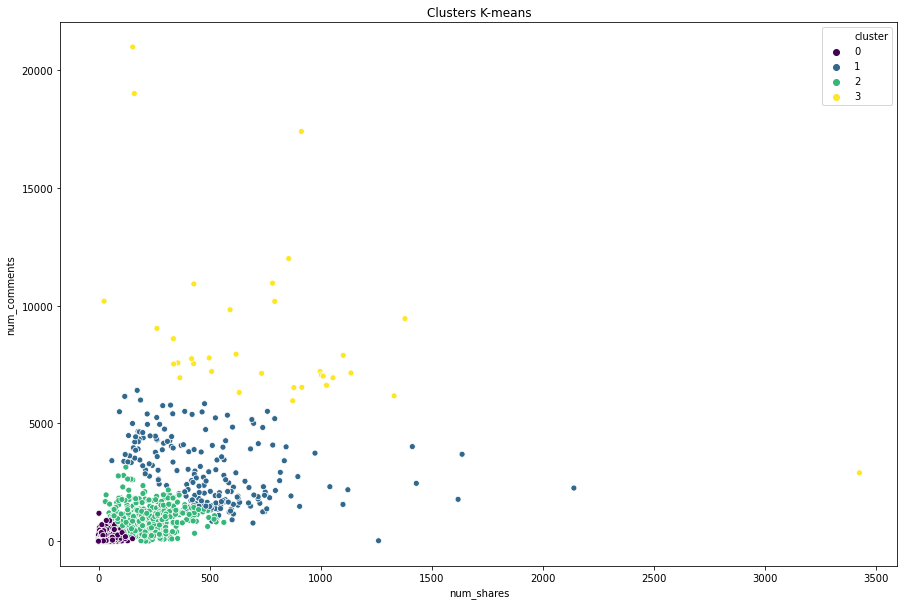

In [92]:
# Graphe de nuage de points suivant les clusters
plt.figure(figsize=(15,10))
sns.scatterplot(data=data, x='num_shares', y='num_comments', hue='cluster', palette='viridis')
plt.title("Clusters K-means")
plt.show()

In [42]:
# La répartition des clusters selon les index
for i in range(4):
    print(f'Clsuter {i}')
    print(data[data.cluster == i].index.tolist())
    print()

Clsuter 0
['246675545449582_1649426988507757', '246675545449582_1648730588577397', '246675545449582_1648576705259452', '246675545449582_1645700502213739', '246675545449582_1645650162218773', '246675545449582_1644824665634656', '246675545449582_1644655795651543', '246675545449582_1638788379571618', '246675545449582_1637655039684952', '246675545449582_1636730006444122', '246675545449582_1635846033199186', '246675545449582_1635730986544024', '246675545449582_1632874756829647', '246675545449582_1628507150599741', '246675545449582_1626584134125376', '246675545449582_1622470701203386', '246675545449582_1619188648198258', '246675545449582_1617858078331315', '246675545449582_1617109651739491', '246675545449582_1617051285078661', '246675545449582_1615645795219210', '246675545449582_1615629888554134', '246675545449582_1615585301891926', '246675545449582_1615510251899431', '246675545449582_1612677855516004', '246675545449582_1612652492185207', '246675545449582_1607114469405676', '246675545449582_

# **Application de l'ACP**

Dans cette partie, nous allons essayer de réduire les dimensions de notre dataset en deux dimensions, en utilisant l'ACP.

In [48]:
# Fonction pour afficher les composantes principales
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker ='o')
    plt.xlabel("Nombre de composantes principales")
    plt.ylabel("Proportion de la variance expliquée")
    plt.title("Eboulis des valeurs propres")
    plt.show(block =False)

Nombre de composantes calculées : 9


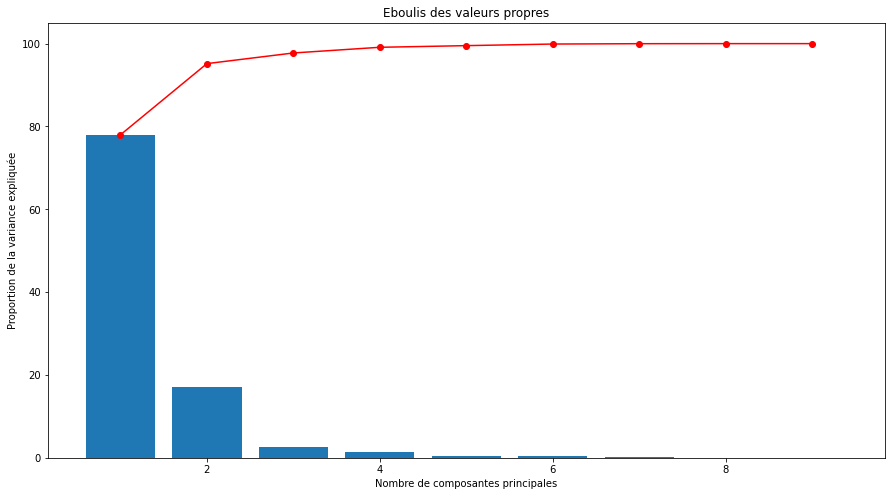

In [49]:
# Choix du nombre de composantes à calculer vue qu'on a 9 paramètres (numériques)
n_comp = 9

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(df_scaled)
print('Nombre de composantes calculées :', pca.n_components_)

# Eboulis des valeurs propres
plt.figure(figsize=(15,8))
display_scree_plot(pca)

On peut remarquer que les deux premières composantes, ont presque plus de 90% de variance.

In [58]:
# Application de l'acp pour les 2 composantes 
pca_normale  = PCA(n_components=2).fit_transform(df_scaled)
Xk_projected = pca.transform(df_scaled)

In [59]:
import seaborn as sns

In [63]:
Xk_projected

array([[ 4.90984725e+01,  3.79850676e+01, -1.90208393e+00, ...,
         3.28829107e-01, -6.24150888e-01, -4.89260639e-05],
       [-1.45270106e+01, -2.02129317e+00, -6.09333095e-01, ...,
        -1.12335444e-01, -1.96561962e-02, -7.97032117e-06],
       [ 3.54575577e+00,  3.33754287e+00, -6.47322852e-02, ...,
        -2.90991300e-01, -1.55603493e-01, -1.72415980e-05],
       ...,
       [-1.44731067e+01, -1.95452898e+00, -5.20106929e-01, ...,
        -1.09452950e-01, -2.30730445e-02, -8.83384203e-06],
       [-1.06066445e+01,  1.67791339e+00, -1.92883164e+00, ...,
        -1.28941345e-01, -3.52843769e-02, -4.34052704e-06],
       [-1.45409881e+01, -2.04290334e+00, -6.93223870e-01, ...,
        -1.05342612e-01, -1.73714892e-02, -7.47589796e-06]])

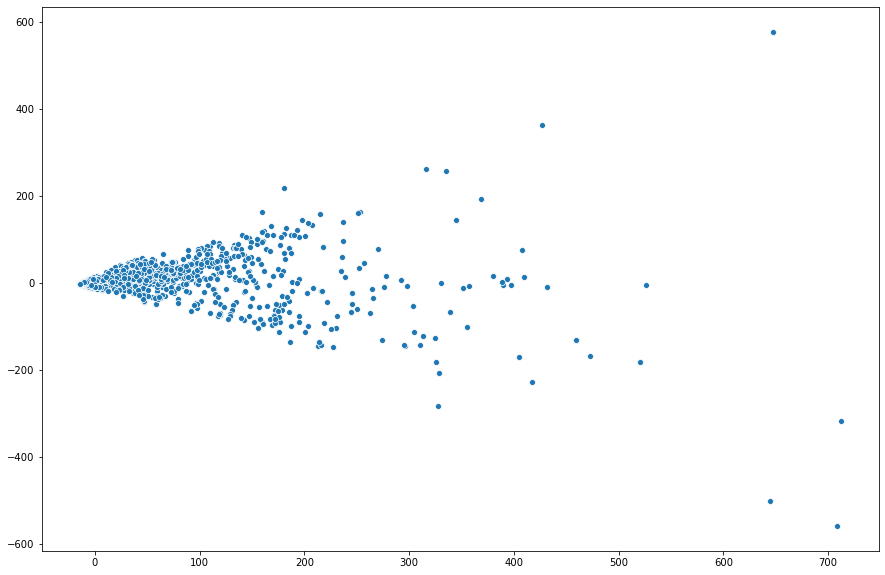

In [87]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = pd.DataFrame(Xk_projected), x =Xk_projected[:, 0], y = Xk_projected[:, 1], alpha = 1)
plt.show()

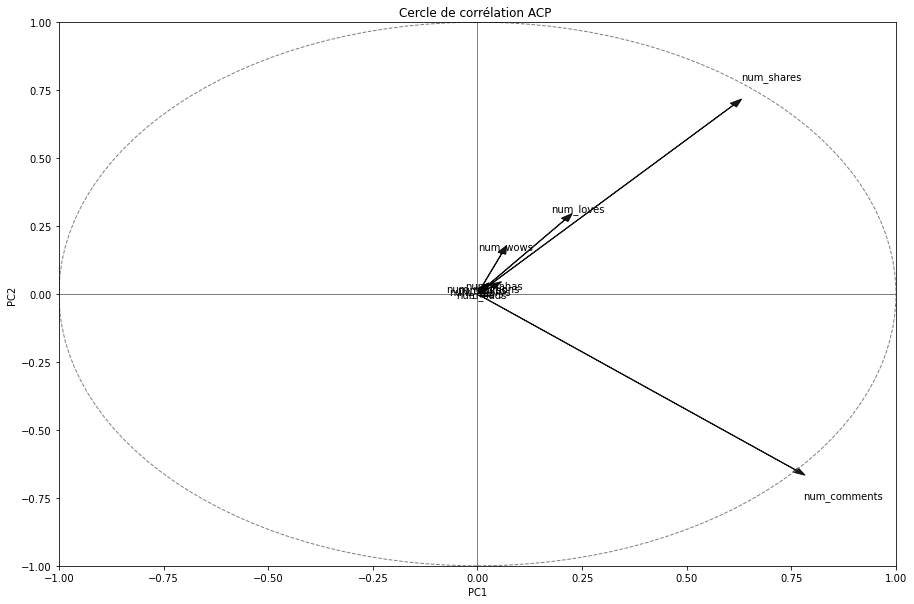

In [88]:
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(15,10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, data[numCols].columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP ')

# Afficher la figure
plt.show()


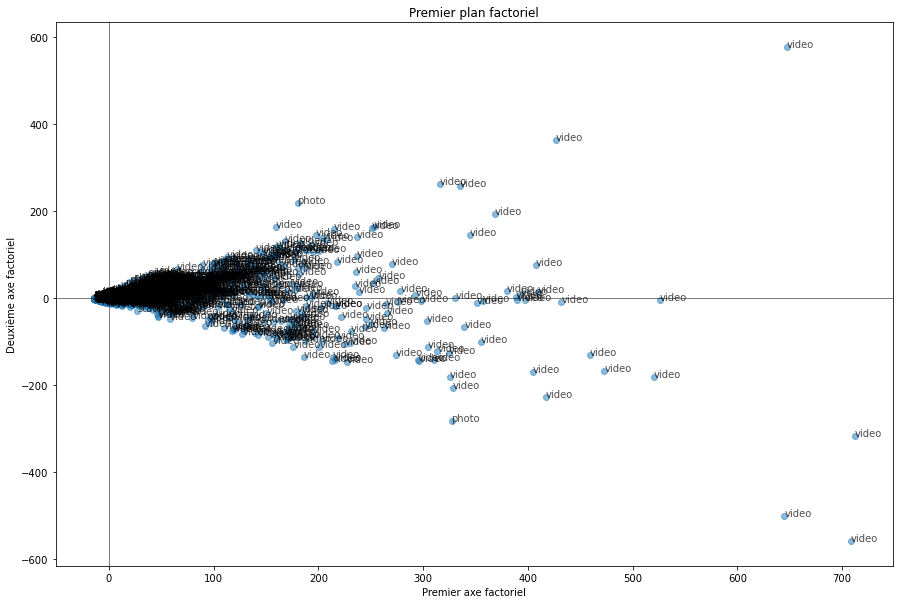

In [86]:
# Premier plan factoriel
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(pca_normale[:, 0], pca_normale[:, 1], alpha=0.5)

# Ajouter des étiquettes pour chaque point (type de publication)
for i, status_type in enumerate(data['status_type']):
    ax.annotate(status_type, (pca_normale[i, 0], pca_normale[i, 1]), alpha=0.7)

# Ajouter des axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Labels des axes
ax.set_xlabel('Premier axe factoriel')
ax.set_ylabel('Deuxième axe factoriel')

# Titre du graphique
plt.title('Premier plan factoriel')

# Afficher le graphique
plt.show()

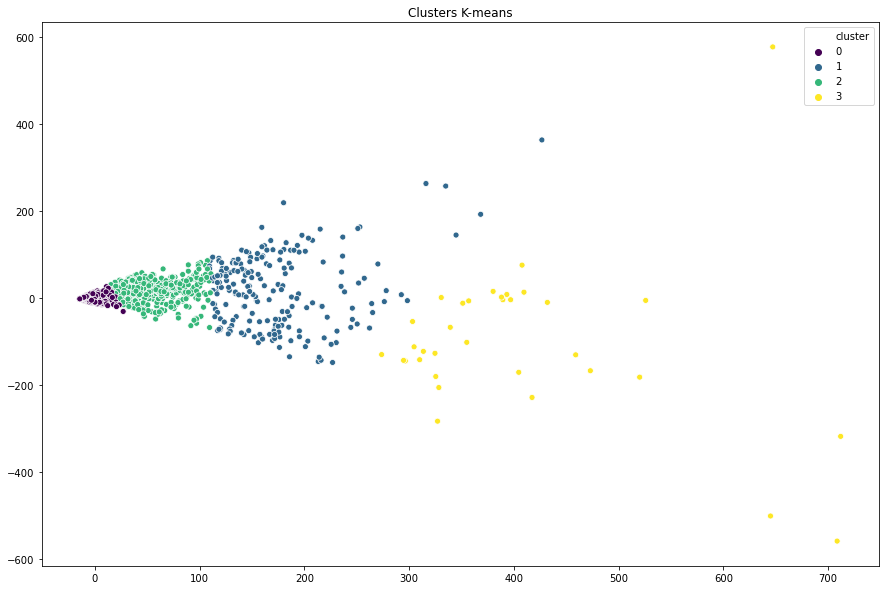

In [91]:
# Graphe de nuage de points des clusters suivant les axes 
plt.figure(figsize=(15,10))
sns.scatterplot(data=data, x=Xk_projected[:, 0], y=Xk_projected[:, 1], hue='cluster', palette='viridis')
plt.title("Clusters K-means")
plt.show()